In [3]:
# check if packages can be loaded, i.e. they are already installed
library(ISLR2) # contains data sets we work with
library(rpart) # package for tree fitting
library(tree) # package for tree fitting used by James et all
library(partykit) # visualisation of tree structures
library(rpart.plot) # visualisation of tree structures

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



2.1 Boston data set

In [4]:
library(ISLR2)
?Boston

Boston                  package:ISLR2                  R Documentation

_B_o_s_t_o_n _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     A data set containing housing values in 506 suburbs of Boston.

_U_s_a_g_e:

     Boston
     
_F_o_r_m_a_t:

     A data frame with 506 rows and 13 variables.

     'crim' per capita crime rate by town.

     'zn' proportion of residential land zoned for lots over 25,000
          sq.ft.

     'indus' proportion of non-retail business acres per town.

     'chas' Charles River dummy variable (= 1 if tract bounds river; 0
          otherwise).

     'nox' nitrogen oxides concentration (parts per 10 million).

     'rm' average number of rooms per dwelling.

     'age' proportion of owner-occupied units built prior to 1940.

     'dis' weighted mean of distances to five Boston employment
          centres.

     'rad' index of accessibility to radial highways.

     'tax' full-value property-tax rate per $10,000.

     'ptratio' pup

2.1.1 Explorative data analysis

In [6]:
data("Boston")
# Q1: ----
nrow(Boston)

[1] 506

In [7]:
# Q2: ----
ncol(Boston)
names(Boston)

[1] 13

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "lstat"   "medv"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   17.02   21.20   22.53   25.00   50.00 

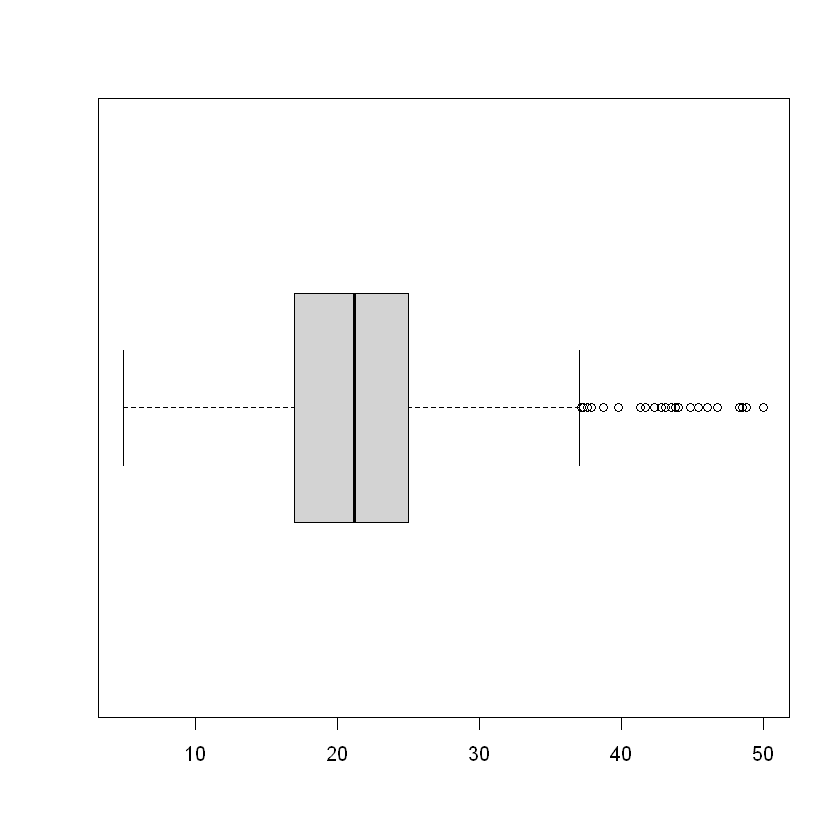

In [8]:
# Q3: ----
summary(Boston$medv)
boxplot(Boston$medv, horizontal = TRUE)

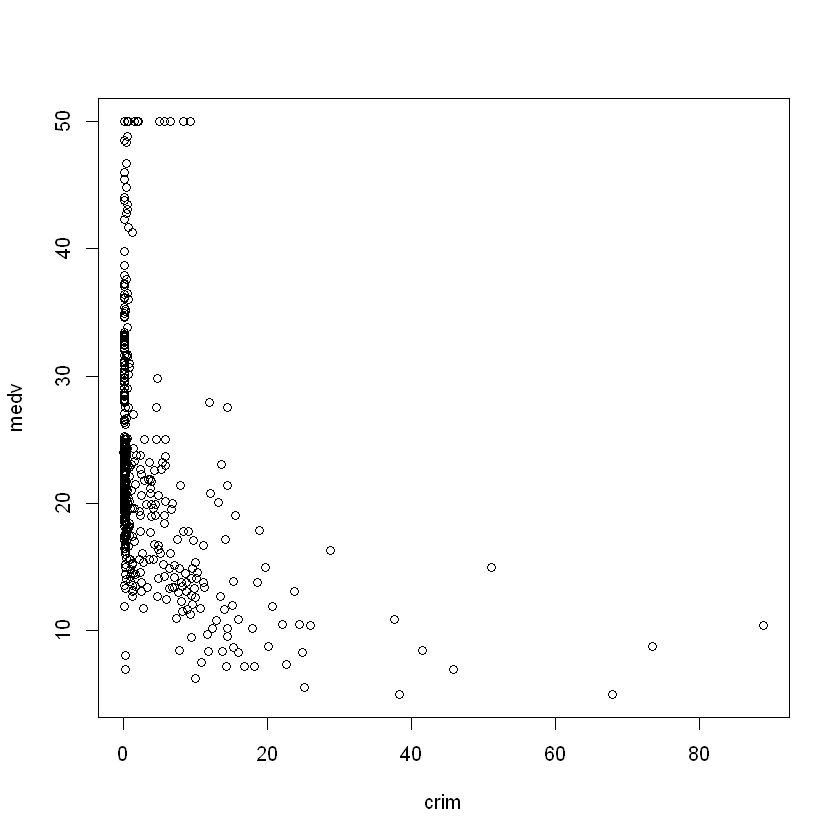

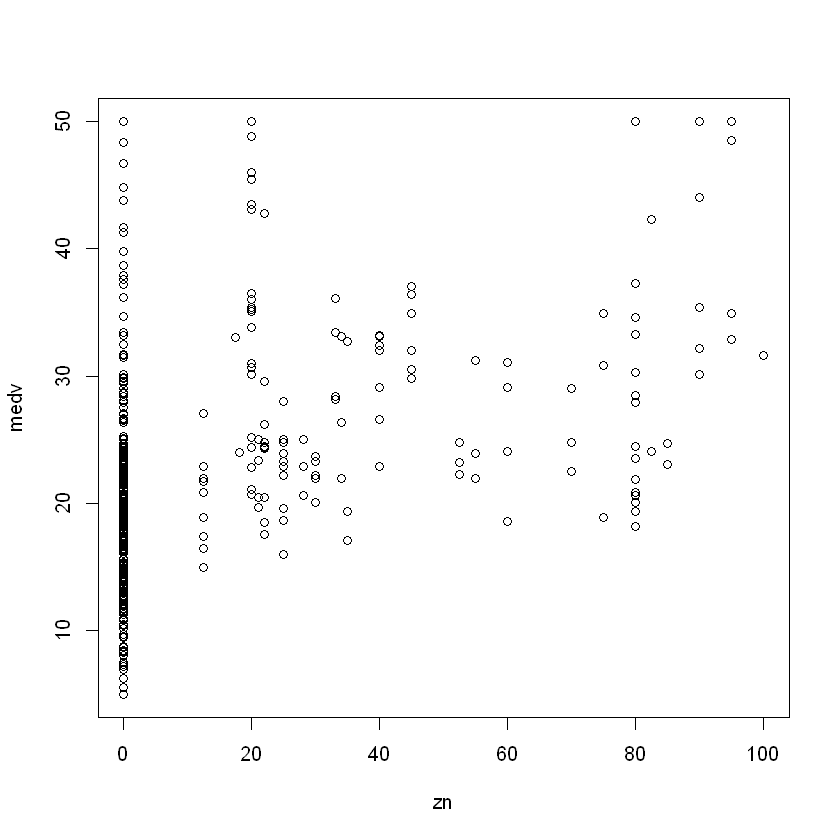

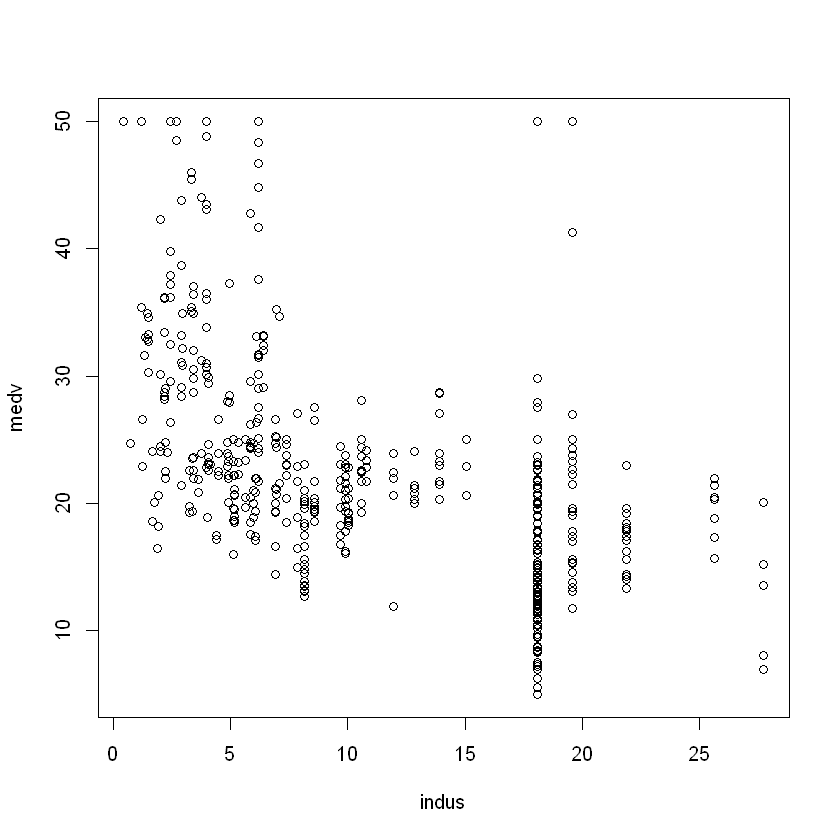

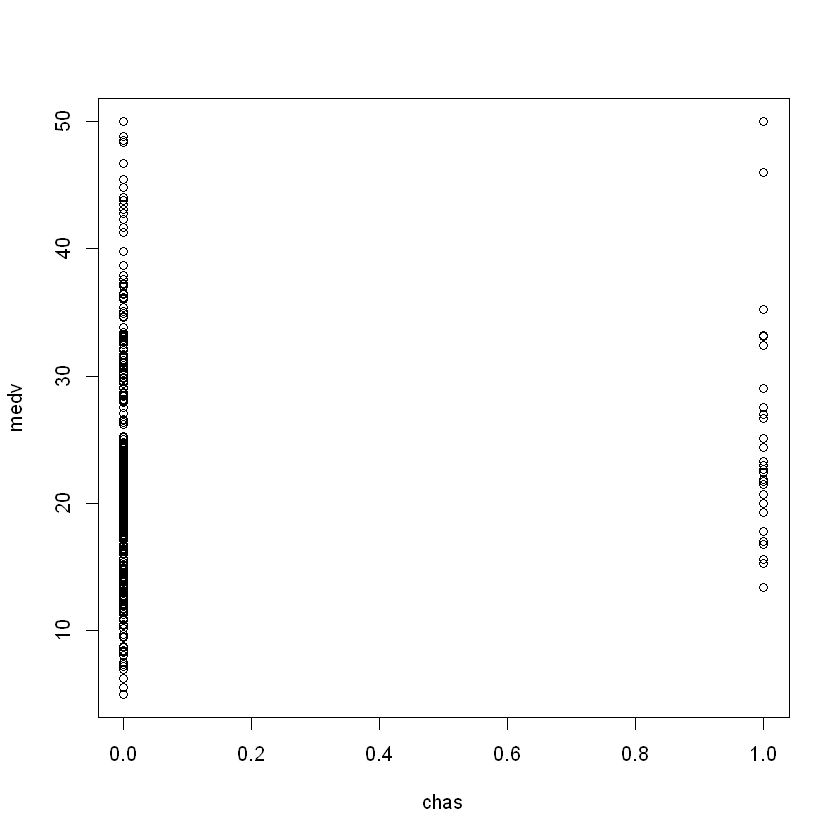

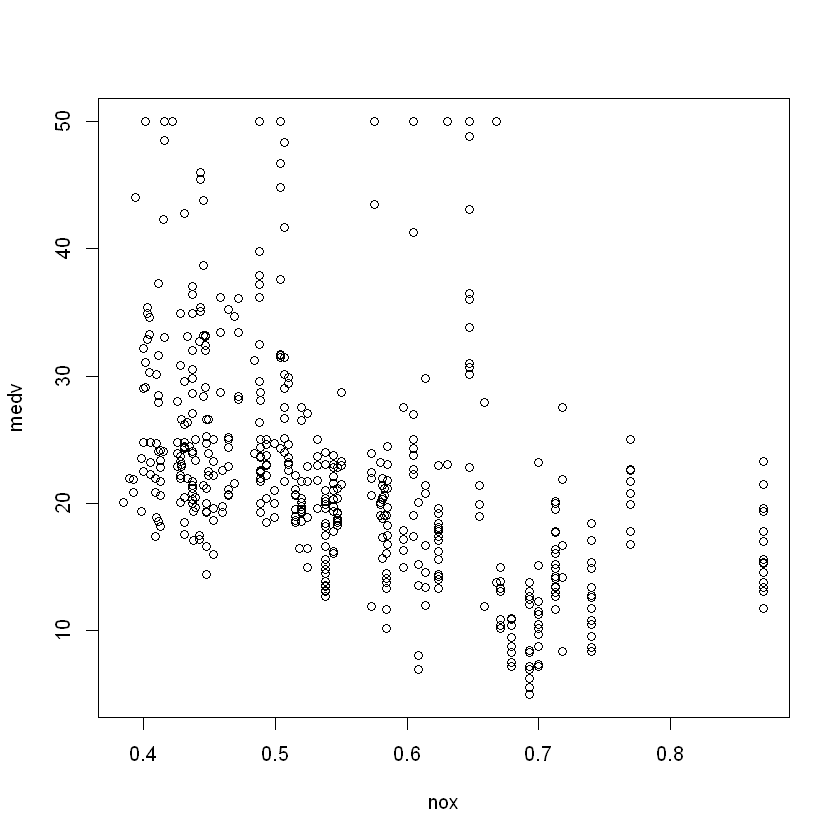

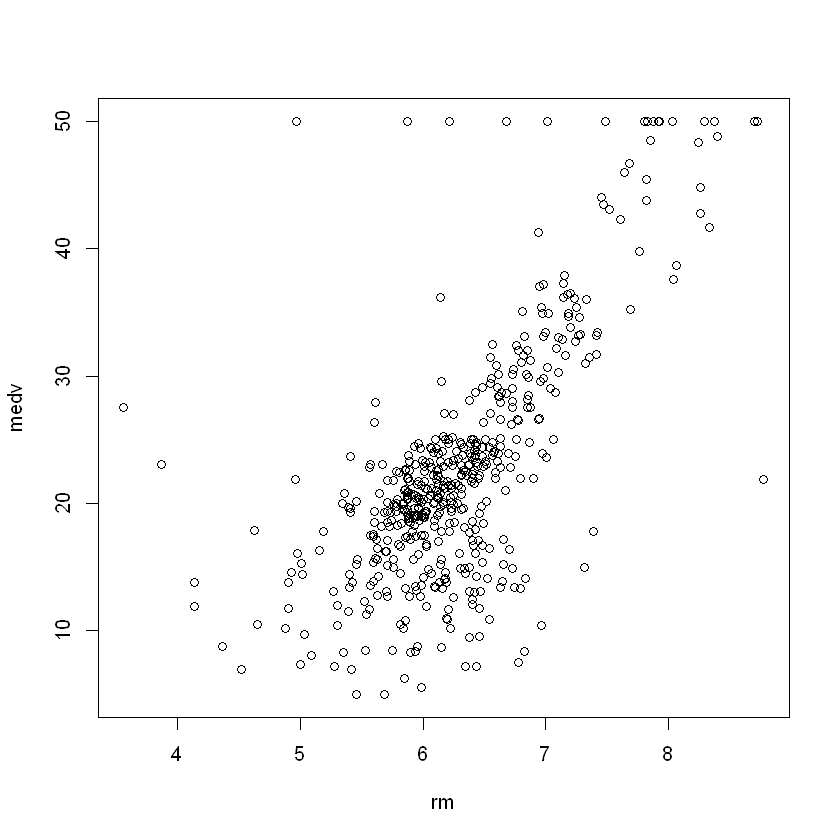

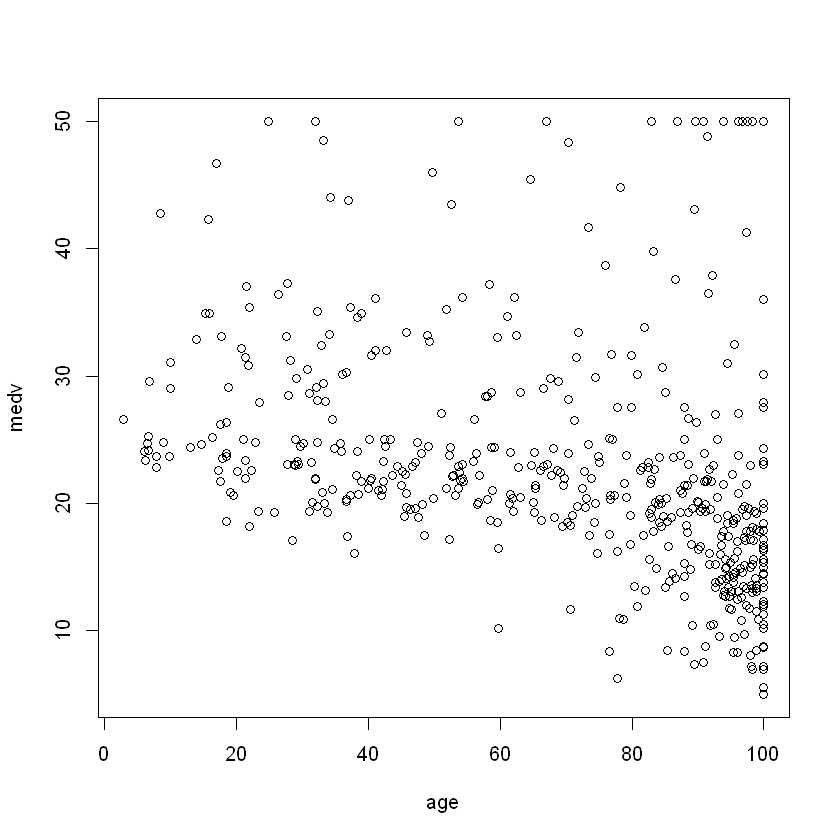

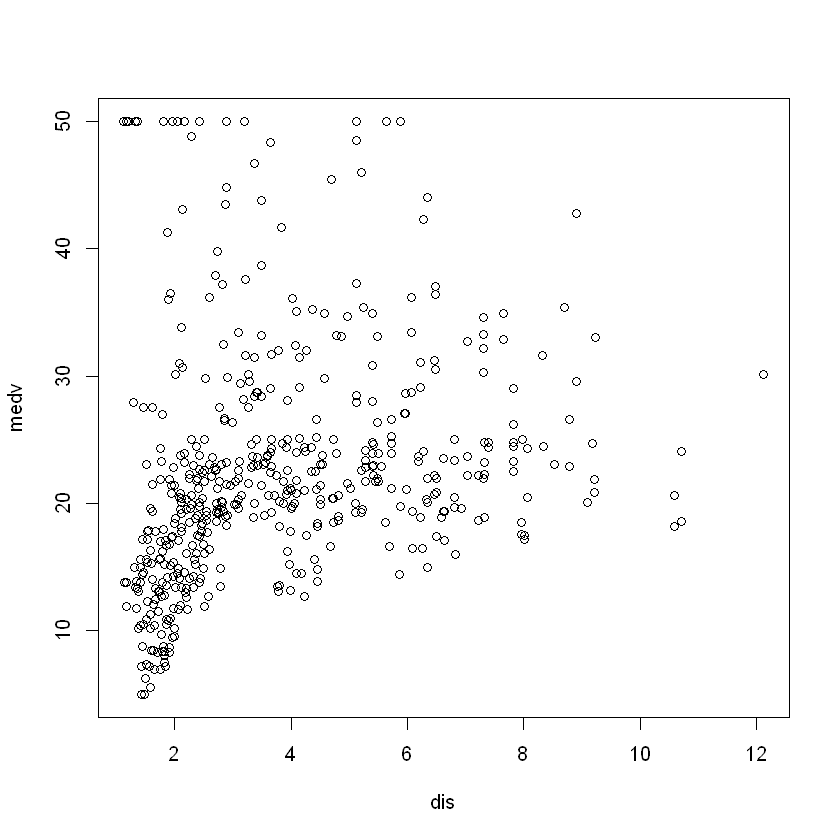

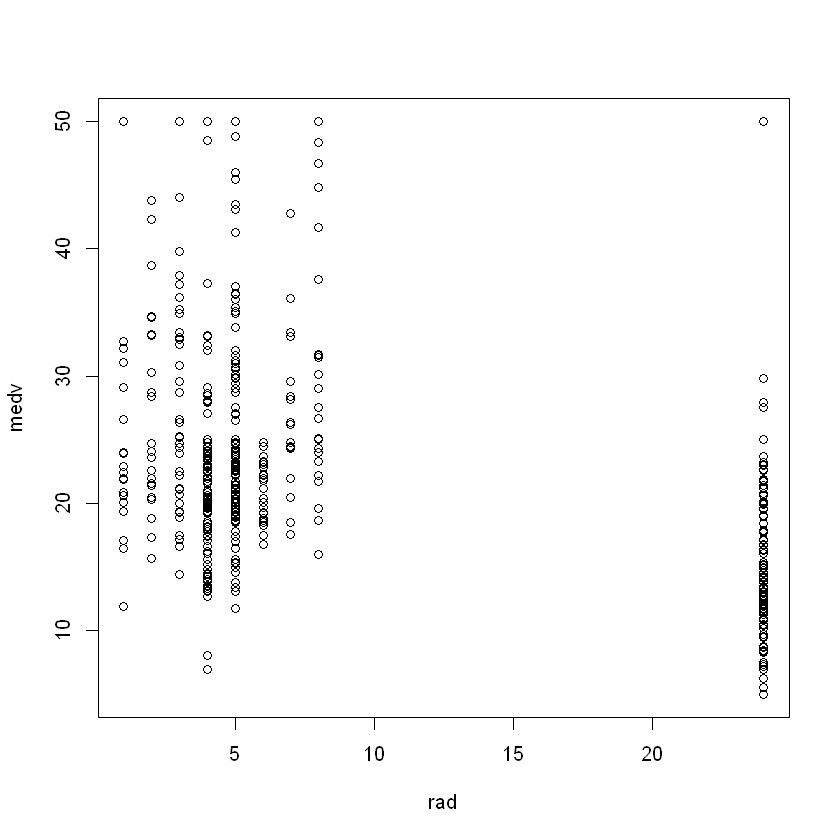

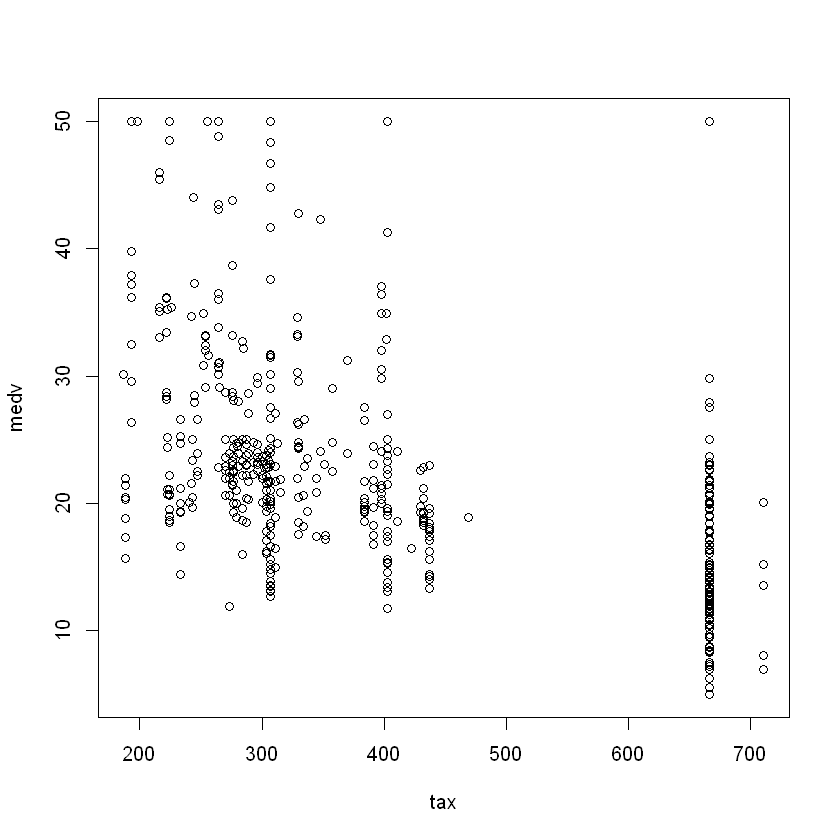

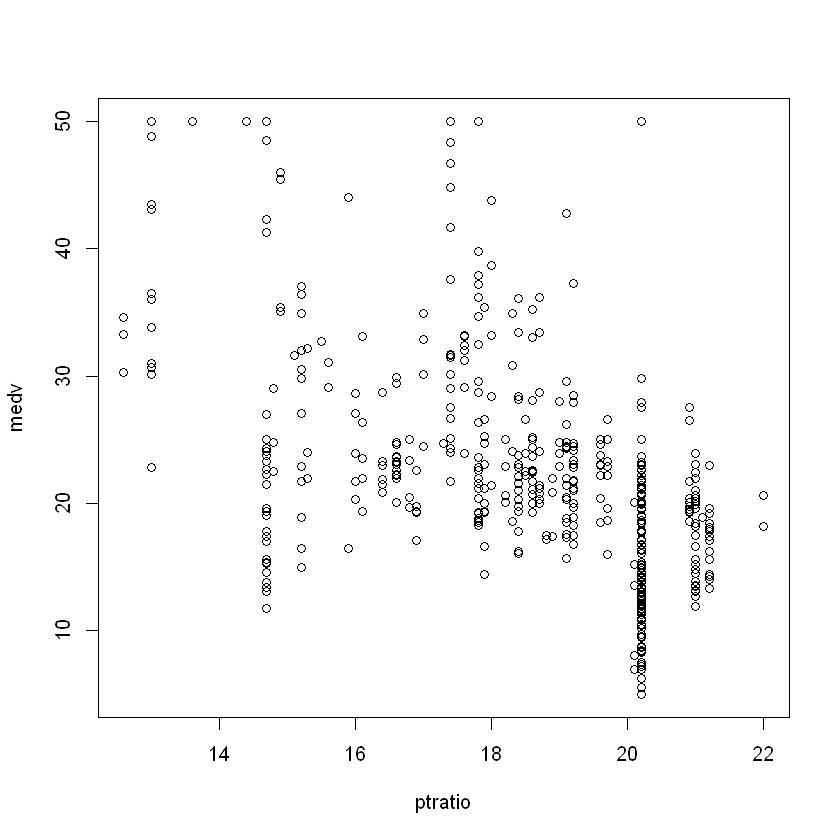

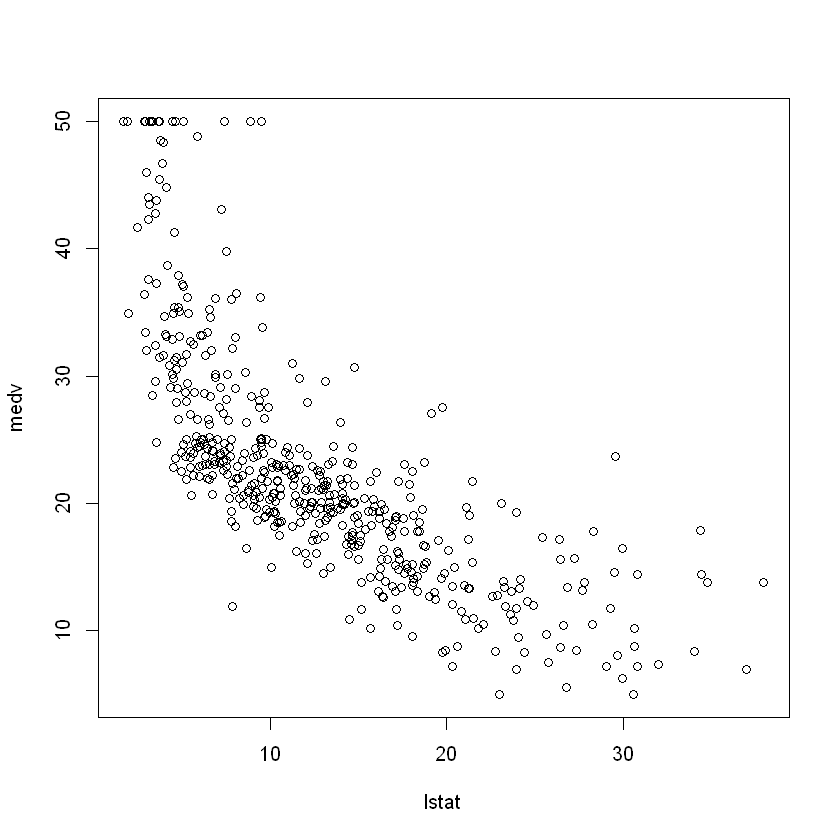

In [9]:
# Q4: ----
plot(medv ~ ., data = Boston)


  0   1 
471  35 

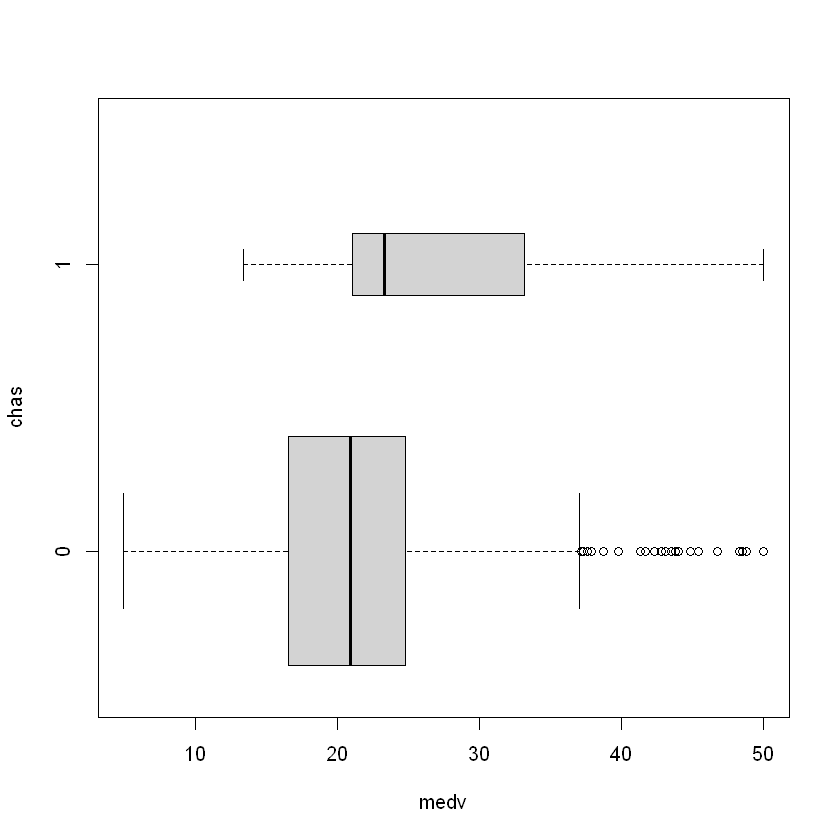

In [10]:
# Q5: ----
table(Boston$chas)
boxplot(medv ~ chas, data = Boston, horizontal = TRUE, varwidth = TRUE)


In [11]:
# Q6: ----
summary(Boston$ptratio)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.60   17.40   19.05   18.46   20.20   22.00 

In [12]:
# Q7: ----
Boston[which.min(Boston$medv), ]
round(colMeans(Boston), 3)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
399,38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,30.59,5


crim      zn   indus    chas     nox      rm     age     dis     rad     tax 
  3.614  11.364  11.137   0.069   0.555   6.285  68.575   3.795   9.549 408.237 
ptratio   lstat    medv 
 18.456  12.653  22.533

In [13]:
# Q8: ----
table(Boston$rm > 7)
table(Boston$rm > 8)


FALSE  TRUE 
  442    64 


FALSE  TRUE 
  493    13 

2.1.2 Regression Tree Model


In [14]:
library(rpart)
library(rpart.plot)

set.seed(1)

train <- sample(1:nrow(Boston), nrow(Boston)/2)
tree.boston <- rpart(medv~., data = Boston, subset = train)
print(tree.boston)


n= 253 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 253 19447.8700 21.78656  
   2) rm< 6.9595 222  6794.2920 19.35360  
     4) lstat>=14.405 87  1553.7870 14.46092  
       8) crim>=11.48635 26   302.7138 10.31538 *
       9) crim< 11.48635 61   613.8026 16.22787  
        18) age>=93.95 31   164.1239 14.42903 *
        19) age< 93.95 30   245.7147 18.08667 *
     5) lstat< 14.405 135  1815.7240 22.50667  
      10) rm< 6.543 111   763.1337 21.37748 *
      11) rm>=6.543 24   256.4696 27.72917 *
   3) rm>=6.9595 31  1928.9870 39.20968  
     6) rm< 7.553 16   505.4900 33.42500 *
     7) rm>=7.553 15   317.0040 45.38000 *


n= 253 

node), split, n, deviance, yval
      * denotes terminal node

  1) root 253 19447.870000 21.786560  
    2) rm< 6.9595 222  6794.292000 19.353600  
      4) lstat>=14.405 87  1553.787000 14.460920  
        8) crim>=11.48635 26   302.713800 10.315380  
         16) nox>=0.675 18    84.860000  8.666667 *
         17) nox< 0.675 8    58.835000 14.025000 *
        9) crim< 11.48635 61   613.802600 16.227870  
         18) age>=93.95 31   164.123900 14.429030  
           36) lstat>=20.11 14    72.063570 13.121430 *
           37) lstat< 20.11 17    48.409410 15.505880 *
         19) age< 93.95 30   245.714700 18.086670  
           38) crim>=0.22452 17   120.384700 16.717650 *
           39) crim< 0.22452 13    51.803080 19.876920 *
      5) lstat< 14.405 135  1815.724000 22.506670  
       10) rm< 6.543 111   763.133700 21.377480  
         20) lstat>=7.76 91   512.815400 20.761540  
           40) indus< 10.3 53   251.921100 20.181130  
             80) nox>=0.5125 23    47.59

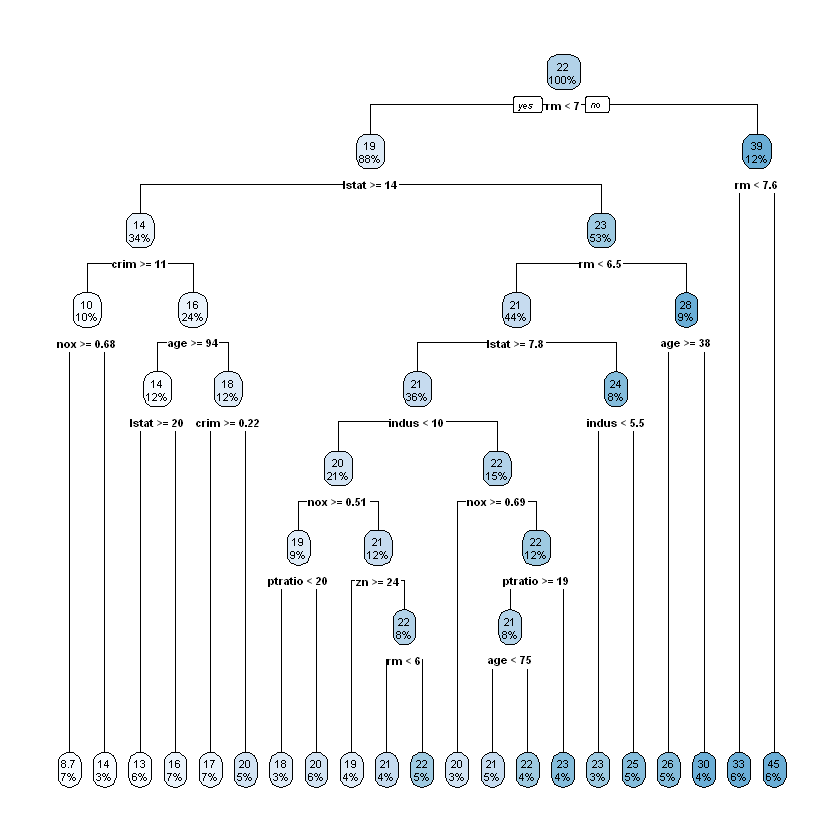

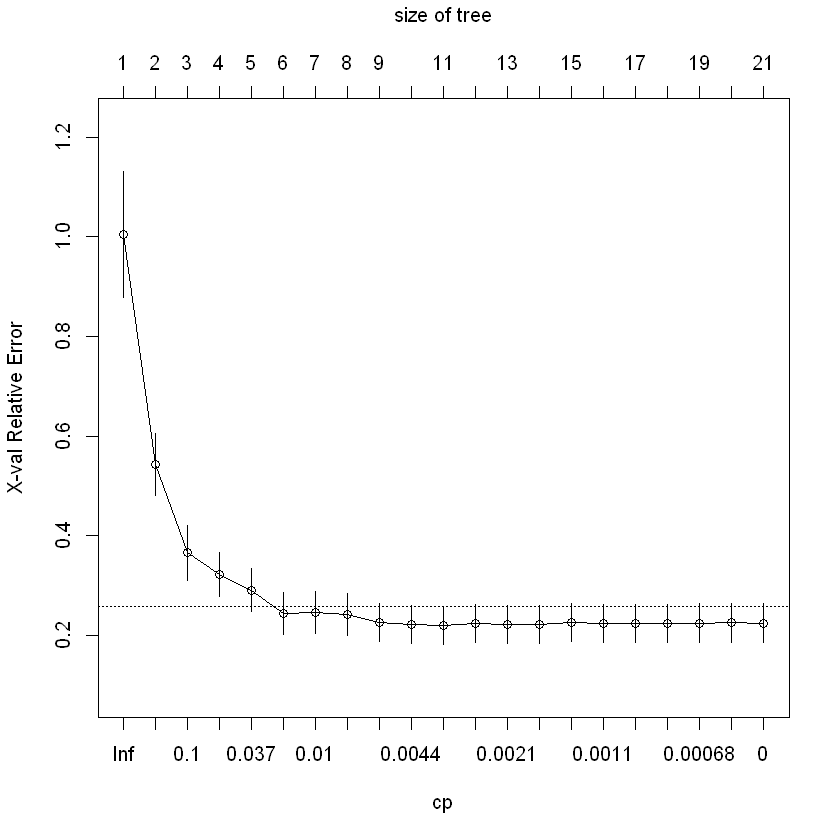

In [15]:
set.seed(1)
tree.boston.full <- rpart(medv ~ . , data = Boston, subset = train, cp = 0)
print(tree.boston.full)
rpart.plot(tree.boston.full)
# Table with cp values from cross validation
cptable <- tree.boston.full$cptable
plotcp(tree.boston.full)

In [16]:
minDeviance <- which.min(cptable[ , "xerror"])
dotted <- cptable[minDeviance, 4] + cptable[minDeviance, 5]
abline(h = dotted, col = "red", lty = 2)
# which is the first row less than this value
cpPruning <- cptable[cptable[, "xerror"] < ???, ][1, ]
cpPruning

ERROR: Error in parse(text = x, srcfile = src): <text>:5:47: unexpected ','
4: # which is the first row less than this value
5: cpPruning <- cptable[cptable[, "xerror"] < ???,
                                                 ^


In [17]:
prune.boston <- prune(tree.boston, cp = ???)
prune.boston
rpart.plot(prune.boston)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:44: unexpected ')'
1: prune.boston <- prune(tree.boston, cp = ???)
                                               ^


In [19]:
# on training data
# full tree
pred.train.full<-predict(tree.boston.full, newdata = Boston[train,])
mean((Boston$medv[train]-pred.train.full)^2)
## default tree
pred.train.default<-predict(tree.boston, newdata = Boston[train,])
mean((Boston$medv[train]-pred.train.default)^2)
## pruned tree
pred.train.pruned<-predict(prune.boston, newdata = Boston[train,])
mean((Boston$medv[train]-pred.train.pruned)^2)

[1] 7.016795

[1] 10.09743

ERROR: Error in eval(expr, envir, enclos): object 'prune.boston' not found


In [21]:
### on the test data
# full tree
pred.test.full <- predict(tree.boston.full, newdata = Boston[-train, ])
mean((Boston$medv[-train] - pred.test.full)^2)
# default tree
pred.test.default <- predict(tree.boston,newdata=Boston[-train,])
mean((Boston$medv[-train]-pred.test.default)^2)
# pruned tree
pred.test.pruned<-predict(prune.boston,newdata=Boston[-train,])
mean((Boston$medv[-train]-pred.test.pruned)^2)


[1] 32.71518

[1] 35.28688

ERROR: Error in eval(expr, envir, enclos): object 'prune.boston' not found


In [22]:
boston.test <- Boston[-train, "medv"]
plot(pred.test.pruned, boston.test)
abline(c(0,1), col = "red", lty = 2)

ERROR: Error in eval(expr, envir, enclos): object 'pred.test.pruned' not found


2.2 Car seat data

3 Written Exercises